<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<AxesSubplot:xlabel='ConvertedComp'>

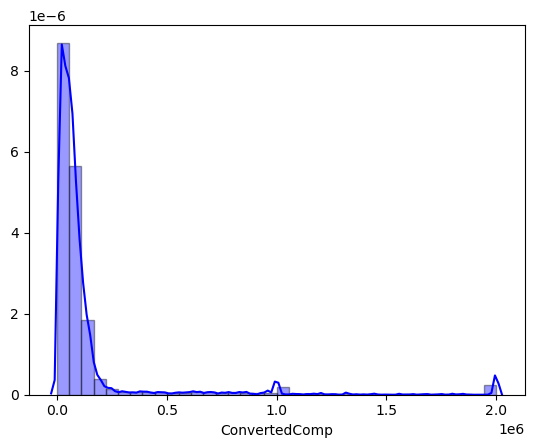

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['ConvertedComp'], hist=True, kde=True,
             bins=int(180/5), color='blue',
             hist_kws={'edgecolor':'black'})

Plot the histogram for the column `ConvertedComp`.


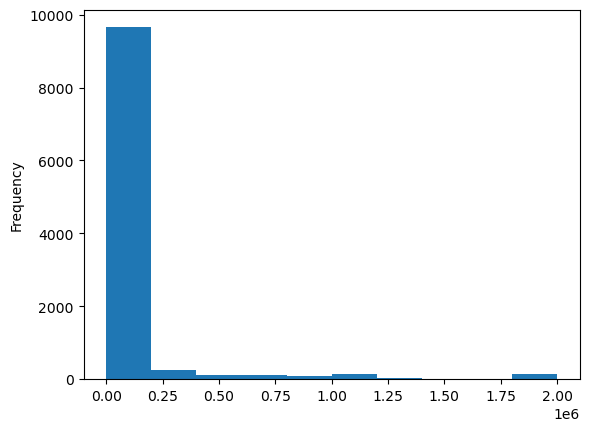

In [4]:
df['ConvertedComp'].plot(kind='hist')
plt.show()

What is the median of the column `ConvertedComp`?


In [5]:
print(df['ConvertedComp'].median())

57745.0


What is the median Age of survey respondents? 

In [6]:
print(df['Age'].median())

29.0


How many responders identified themselves only as a **Man**?


In [7]:
print(df['Gender'].tolist().count('Man'))

10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [8]:
df2=df.loc[df['Gender']=='Woman']

print(df2.groupby('Gender')['ConvertedComp'].median())

Gender
Woman    57708.0
Name: ConvertedComp, dtype: float64


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [9]:
print(df['Age'].describe().loc[['min','25%','mean','75%','max']])

min     16.000000
25%     25.000000
mean    30.778895
75%     35.000000
max     99.000000
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


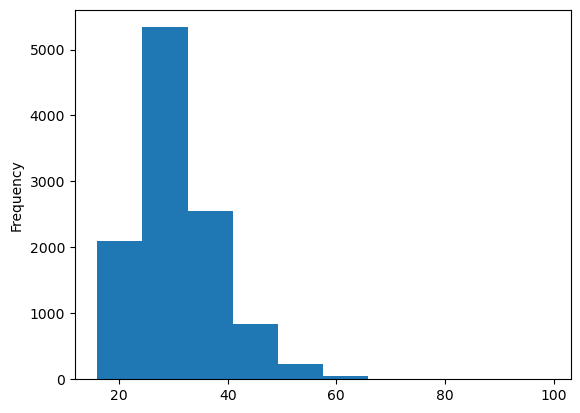

In [10]:
df['Age'].plot(kind='hist')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:xlabel='ConvertedComp'>

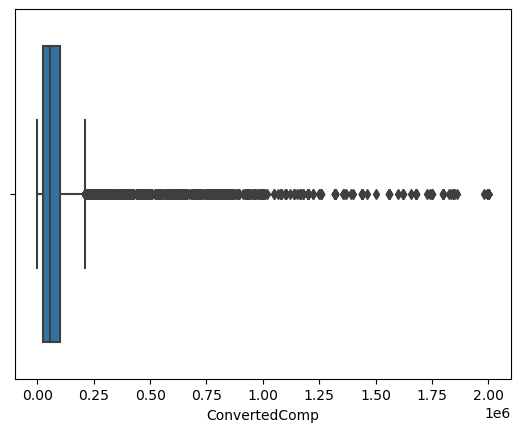

In [11]:
sns.boxplot(df['ConvertedComp'],data=df)

<AxesSubplot:xlabel='Age'>

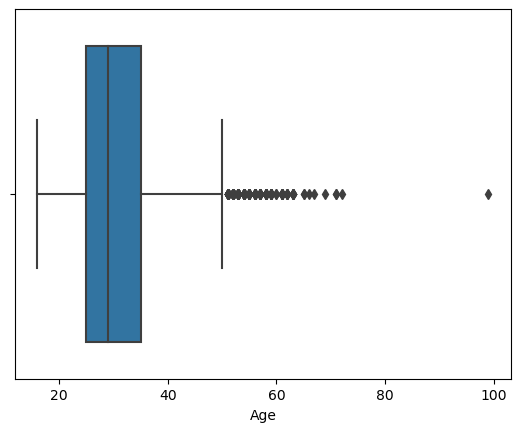

In [32]:
sns.boxplot(df['Age'],data=df)

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [12]:
import numpy as np
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

73132.0


Find out the upper and lower bounds.


In [13]:
lower=df['ConvertedComp'].min()
upper=df['ConvertedComp'].max()
print('upper:',upper)
print('lower:',lower)

upper: 2000000.0
lower: 0.0


Identify how many outliers are there in the `ConvertedComp` column.


In [14]:
outliers = (df['ConvertedComp']<(Q1-1.5*IQR)) | (df['ConvertedComp']>(Q3+1.5*IQR))
print(outliers.sum())

879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [15]:
df1=df[(df['ConvertedComp'] > (Q1 - 1.5 * IQR)) & (df['ConvertedComp'] < (Q3 + 1.5 * IQR))]  
print("mean after removing outliers:",df1['ConvertedComp'].mean())
print("meadian after removing outliers:",df1['ConvertedComp'].median())

mean after removing outliers: 59883.20838915799
meadian after removing outliers: 52704.0


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [16]:
# your code goes here
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
